## 0. Imports

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1. Data collection

In [142]:
df = pd.read_csv('data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Data preparation

### 2.1 Column names

In [143]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [144]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 2.1 Types

In [145]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [146]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [147]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2.3 Null data

In [148]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 3. Exploratory Data Analysis

### 3.1 Column inspection

In [149]:
print('Column inspection:')
for col in df.columns:
    print ('\nName:', col)
    print ('Exemples:', df[col].unique()[:5])
    print ('Number of distinct classes:',df[col].nunique())

Column inspection:

Name: make
Exemples: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of distinct classes: 48

Name: model
Exemples: ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of distinct classes: 914

Name: year
Exemples: [2011 2012 2013 1992 1993]
Number of distinct classes: 28

Name: engine_fuel_type
Exemples: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of distinct classes: 10

Name: engine_hp
Exemples: [335. 300. 230. 320. 172.]
Number of distinct classes: 356

Name: engine_cylinders
Exemples: [ 6.  4.  5.  8. 12.]
Number of distinct classes: 9

Name: transmission_type
Exemples: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of distinct classes: 5

Name: driven_wheels
Exemples: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of distinct classes: 4

Name: number_of_doors
Exemples: [ 2.  4.  3. nan]
Number

### 3.1 Target variable

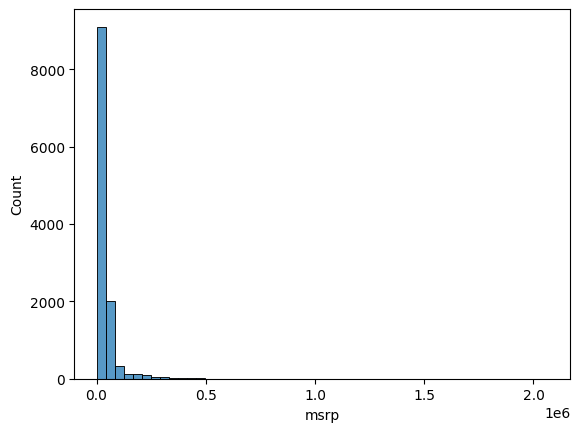

In [150]:
sns.histplot(df.msrp, bins=50);

Long tail distribution

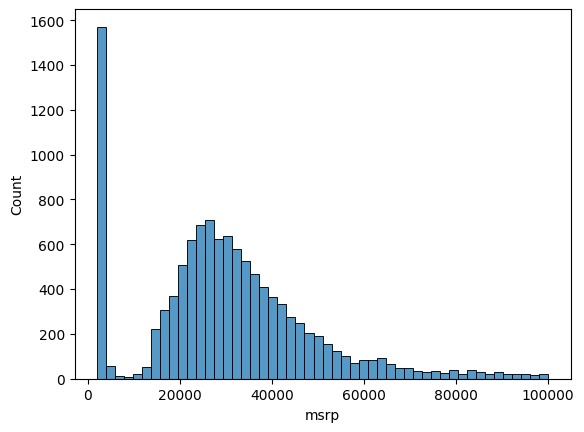

In [151]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50);

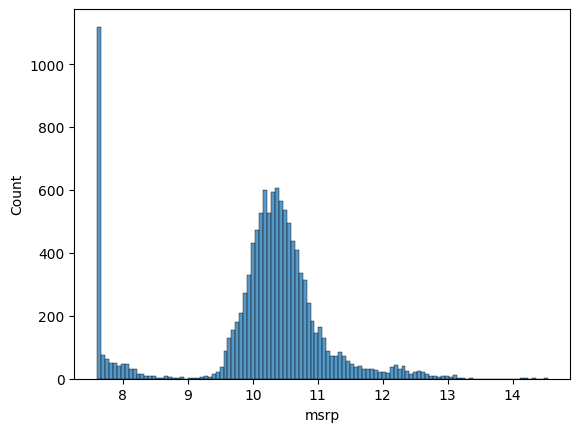

In [152]:
sns.histplot(np.log1p(df.msrp));

## 4. Setting up the validation framework

In [153]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

7150 2382 2382


In [156]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [157]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 4. Linear Regression - Baseline

### 4.1 Define model

In [332]:
def train_linear_regression(X,y, reg=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    XTX_reg = XTX + reg * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX_reg)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

### 4.2 Train model

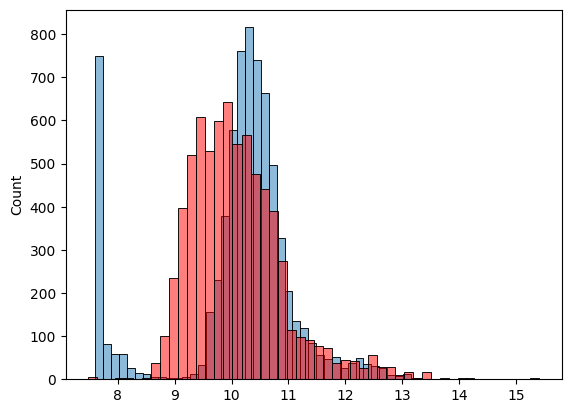

In [159]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression (X_train, y_train)
y_pred = w0 + X_train.dot(w)
sns.histplot(y_train, bins=50, alpha=0.5);
sns.histplot(y_pred, color='red', bins=50, alpha=0.5);

### 4.3 Model validation

In [192]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

## RMSE
def rmse(y,y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [193]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058326

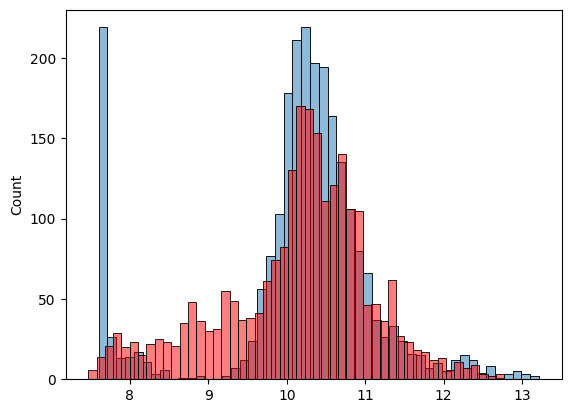

In [194]:
sns.histplot(y_val, bins=50, alpha=0.5);
sns.histplot(y_pred, color='red', bins=50, alpha=0.5);

## 5. Categorical variables

In [205]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for i in [2,3,4]:
        df[f'num_doors_{i}'] = (df.number_of_doors == i).astype('int')
        features.append(f'num_doors_{i}')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [341]:
def prepare_X(df):
    df = df.copy()
    
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    cat_cols = ['make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category','vehicle_size', 'vehicle_style']
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    categorical = {}

    for c in cat_cols:
        categorical[c] = list(df_train[c].value_counts().head().index)
    
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)
        
    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [342]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, reg=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286355431

## 6. Tuning the model

In [363]:
for r in list(sorted([10, 1, 0.01, 0.001, 0.0001, 0.00001])):
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, reg=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print (r, w0, score)

1e-05 6.964568277053229 0.4608153102104639
0.0001 7.128353751613241 0.46081536801949813
0.001 7.130825091693416 0.46081585850322787
0.01 7.118382372356223 0.4608208286355431
1 6.250747847471081 0.46158128382754804
10 4.729512585698072 0.47260987726658077


In [364]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, reg=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.46081585850322787

## 7. Using the model

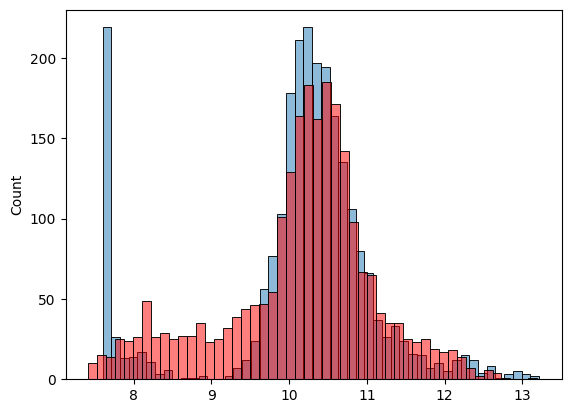

In [370]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression(X_full_train, y_full_train, reg=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)
sns.histplot(y_val, bins=50, alpha=0.5);
sns.histplot(y_pred, color='red', bins=50, alpha=0.5);
sns.histplot(y_pred, color='red', bins=50, alpha=0.5);